In [1]:
import pandas as pd
import numpy_financial
import matplotlib.pyplot as plt

In [30]:
countries = ['DK', 'NL', 'BE', 'DE', 'PL', 'CZ', 'AT', 'CH']

# Input

In [31]:
params = {
    'capacity': 2, # MW
    'invest': 963000, # €/MW
    'cost_qfix': 11340, # €/MW/year
    'lifetime': 30, # years
    'wacc': 0.073,  
    'availability': 0.9
}

In [36]:
factor = 1/8
turbines = pd.DataFrame()
for c in countries:
    tmp = pd.read_csv(f"../build/turbines-{c}.csv", index_col=0)[['lcoe_eur_per_mwh', 'disamenity_cost_eur_per_mwh', '1', '2', '3', '4']]
    tmp.columns = ['engineering', 'disamenity', 1, 2, 3, 4]
    tmp['disamenity'] = factor * tmp['disamenity']
    tmp['total'] = tmp['engineering'] + tmp['disamenity']
    tmp[c] = 2
    turbines = turbines.append(tmp)
    #tmp['total'].sort_values().reset_index(drop=True).plot()
turbines.mean()

engineering      42.908744
disamenity        2.474464
1               277.909668
2              1059.288206
3              2003.056687
4              2976.533388
total            45.383207
DK                2.000000
NL                2.000000
BE                2.000000
DE                2.000000
PL                2.000000
CZ                2.000000
AT                2.000000
CH                2.000000
dtype: float64

# Plot

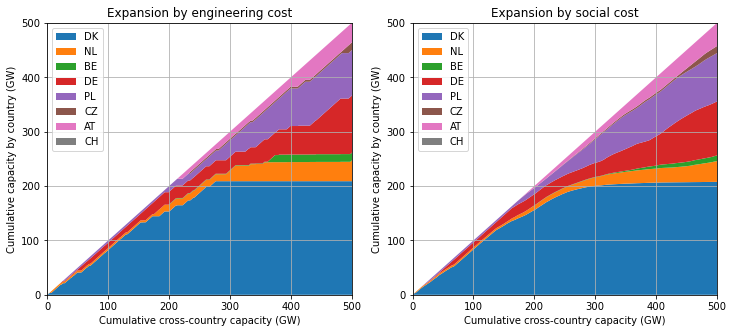

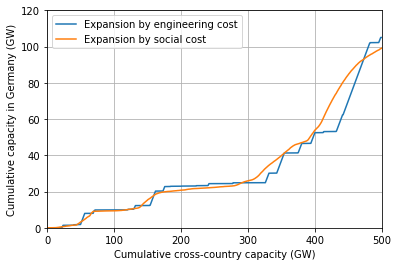

In [37]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(121)

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_eng = turbines.fillna(0).sort_values('engineering').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in countries:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[c], label=c)
    bottom += tmp_eng[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 500)
plt.ylim(0, 500)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost')
plt.grid()

ax = fig.add_subplot(122)
#plt.figure(figsize=[6,5])

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_soc = turbines.fillna(0).sort_values('total').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in countries:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_soc[c], label=c)
    bottom += tmp_soc[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 500)
plt.ylim(0, 500)

plt.legend(loc='upper left')
plt.title('Expansion by social cost')
plt.grid()

# DE only
expansion_DE = pd.concat([tmp_eng['DE'], tmp_soc['DE']], axis=1, keys=['Expansion by engineering cost', 'Expansion by social cost'])
expansion_DE.index = cumulative_capacity
expansion_DE.plot()
plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity in Germany (GW)')
plt.xlim(0, 500)
plt.ylim(0, 120)
plt.grid()

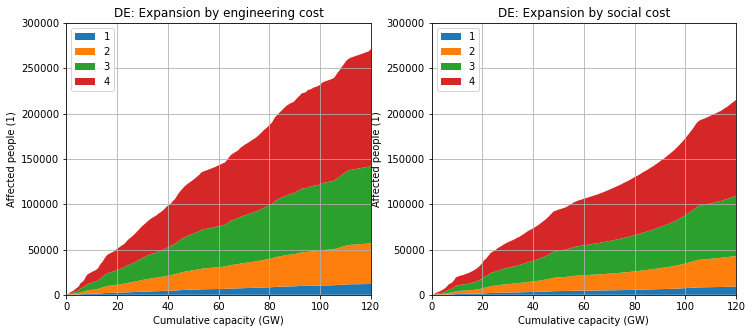

In [38]:
tmp = turbines[turbines['DE']>0]

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(121)

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(tmp))]

tmp_eng = tmp.fillna(0).sort_values('engineering').reset_index(drop=True)[list(range(1, 5))].cumsum() /1000

bottom = 0
for c in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[c], label=c)
    bottom += tmp_eng[c]

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Affected people (1)')
plt.xlim(0, 120)
plt.ylim(0, 300000)

plt.legend(loc='upper left')
plt.title('DE: Expansion by engineering cost')
plt.grid()

ax = fig.add_subplot(122)

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(tmp))]

tmp_eng = tmp.fillna(0).sort_values('total').reset_index(drop=True)[list(range(1, 5))].cumsum() /1000

bottom = 0
for c in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[c], label=c)
    bottom += tmp_eng[c]

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Affected people (1)')
plt.xlim(0, 120)
plt.ylim(0, 300000)

plt.legend(loc='upper left')
plt.title('DE: Expansion by social cost')
plt.grid()

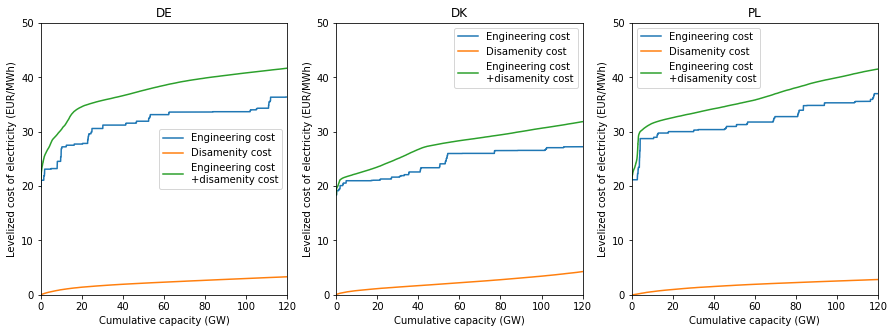

In [18]:
fig = plt.figure(figsize=[15,5])

for i, c in enumerate(countries):
    
    ax = fig.add_subplot(131+i)
    
    tmp = turbines[turbines[c]>0]

    cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(tmp))]

    engineering_cost = tmp['engineering'].sort_values()
    plt.plot(cumulative_capacity, engineering_cost, label='Engineering cost')

    disamenity_cost = tmp['disamenity'].sort_values()
    plt.plot(cumulative_capacity, disamenity_cost, label='Disamenity cost')

    total_cost = tmp['total'].sort_values()
    plt.plot(cumulative_capacity, total_cost, label='Engineering cost\n+disamenity cost')

    plt.xlabel('Cumulative capacity (GW)')
    plt.ylabel('Levelized cost of electricity (EUR/MWh)')
    plt.xlim(0, 120)
    plt.ylim(0, 50)

    plt.legend()
    plt.title(c)

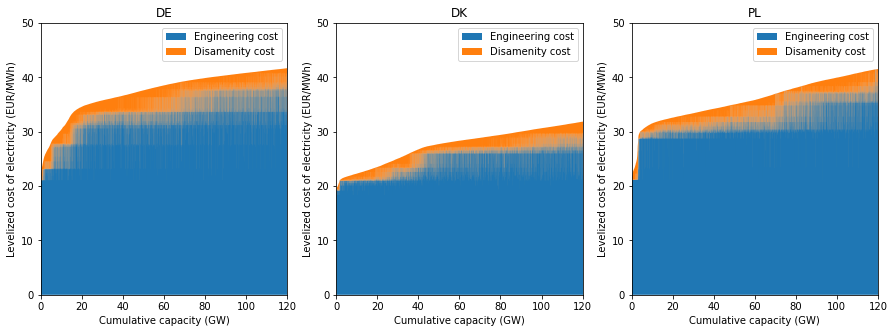

In [19]:
fig = plt.figure(figsize=[15,5])

for i, c in enumerate(countries):
    
    ax = fig.add_subplot(131+i)
    
    tmp = turbines[turbines[c]>0]
    
    cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(tmp))]

    engineering_cost = tmp.sort_values(['total', 'engineering'])['engineering']
    plt.fill_between(cumulative_capacity, 0, engineering_cost, label='Engineering cost')

    disamenity_cost = tmp.sort_values('total')['total']
    plt.fill_between(cumulative_capacity, engineering_cost, disamenity_cost, label='Disamenity cost')

    plt.xlabel('Cumulative capacity (GW)')
    plt.ylabel('Levelized cost of electricity (EUR/MWh)')
    plt.xlim(0, 120)
    plt.ylim([0,50])

    plt.legend()
    plt.title(c)

(0.0, 20.0)

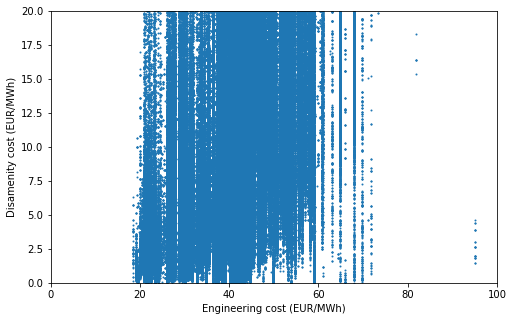

In [20]:
plt.figure(figsize=[8,5])

plt.scatter(turbines['engineering'], turbines['disamenity'], 1)

plt.xlabel('Engineering cost (EUR/MWh)')
plt.ylabel('Disamenity cost (EUR/MWh)')
plt.xlim(0, 100)
plt.ylim(0, 20)